In [57]:
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent

In [58]:
# About Q-learning: https://en.wikipedia.org/wiki/Q-learning

# Hyperparameters
EPOCHS = 20000
ALPHA = 0.5     # learning rate
GAMMA = 0.5     # discount rate

### The implementation relies on random initialization

In [59]:
agent = Agent(ALPHA, GAMMA, EPOCHS)
print("The process started..")
agent.learn()
print("Ready!")

The process started..
Epoch 0 Epsilon 1.0 Random number 0.42858645839139264 Epsilon < random number:  False
Epoch 1000 Epsilon 0.3742006467597279 Random number 0.08993585973802128 Epsilon < random number:  False
Epoch 2000 Epsilon 0.1439819304042466 Random number 0.6010412758753823 Epsilon < random number:  True
Epoch 3000 Epsilon 0.05928919768418531 Random number 0.11067517322028897 Epsilon < random number:  True
Epoch 4000 Epsilon 0.028132482499846838 Random number 0.5742502474588419 Epsilon < random number:  True
Epoch 5000 Epsilon 0.016670567529094613 Random number 0.8388438378308407 Epsilon < random number:  True
Epoch 6000 Epsilon 0.012453964654899695 Random number 0.4339033897270367 Epsilon < random number:  True
Epoch 7000 Epsilon 0.010902763145898971 Random number 0.7409859226104977 Epsilon < random number:  True
Epoch 8000 Epsilon 0.010332108001623487 Random number 0.1979873754378343 Epsilon < random number:  True
Epoch 9000 Epsilon 0.010122175706045813 Random number 0.313183

In [60]:
import matplotlib.pyplot as plt

### Comparison between random numbers and epsilon values

Text(0.5, 1.0, 'Epsilons')

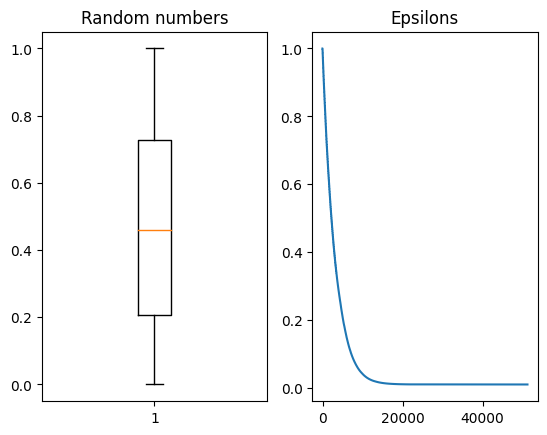

In [61]:
epsilons, rnds = agent.get_epsilons_rnds()
fig, axes = plt.subplots(1, 2)
axes[0].boxplot(rnds)
axes[0].set_title("Random numbers")
axes[1].plot(range(len(epsilons)), epsilons)
axes[1].set_title("Epsilons")

### The best first move for AI, index 4, is in the middle of the board, below key 4 refers to it
- key 4 should have greatest value always

In [62]:
agent.qagent.get_Q_table()["[0 0 0 0 0 0 0 0 0]"]

defaultdict(None,
            {0: 8.282655129875408,
             8: 9.860805214909284,
             2: 10.47495210817588,
             1: 9.747888153373555,
             6: 8.282996347589629,
             3: 3.366799405185651,
             4: 23.542762348589914,
             5: 4.838955829939108,
             7: 2.126101394960841})

### Notice that learning is optimized for positive player

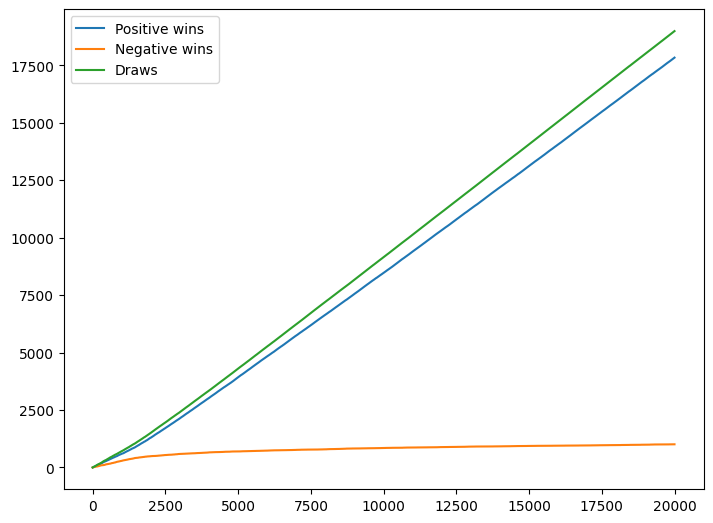

In [63]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(range(len(agent.rewards_pos)), np.cumsum(agent.rewards_pos), label="Positive wins")
ax.plot(range(len(agent.rewards_neg)), np.cumsum(agent.rewards_neg), label="Negative wins")
ax.plot(range(len(agent.rewards_draw)), np.cumsum(agent.rewards_draw), label="Draws")
ax.legend()

In [64]:
import pickle
import datetime

### Save the Q-table for later use

In [66]:
filename = str(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S"))

with open(filename+".pickle", "wb") as handle:
    pickle.dump(agent.qagent.get_Q_table(), handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Saved as", filename +".pickle")

Saved as 2023-10-17-16-03-42.pickle
